In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import sys
sys.path.append('olscheck')
import ols_assumptions_check

import data_generator

In [5]:
# instantiate OLS assumptions check:

ols_checker = ols_assumptions_check.OlsCheck()

In [6]:
# generate data:

data_gen = data_generator.LinearRegressionDataGenerator()
df = data_gen.generate_data()

In [7]:
# fit OLS:

X = df[['X1','X2']]
y = df.y.values

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

df['pred'] = model.predict(X)

VIF Results:
  variables        vif
0        X1  15.624718
1        X2  15.624718
2     const   3.995809


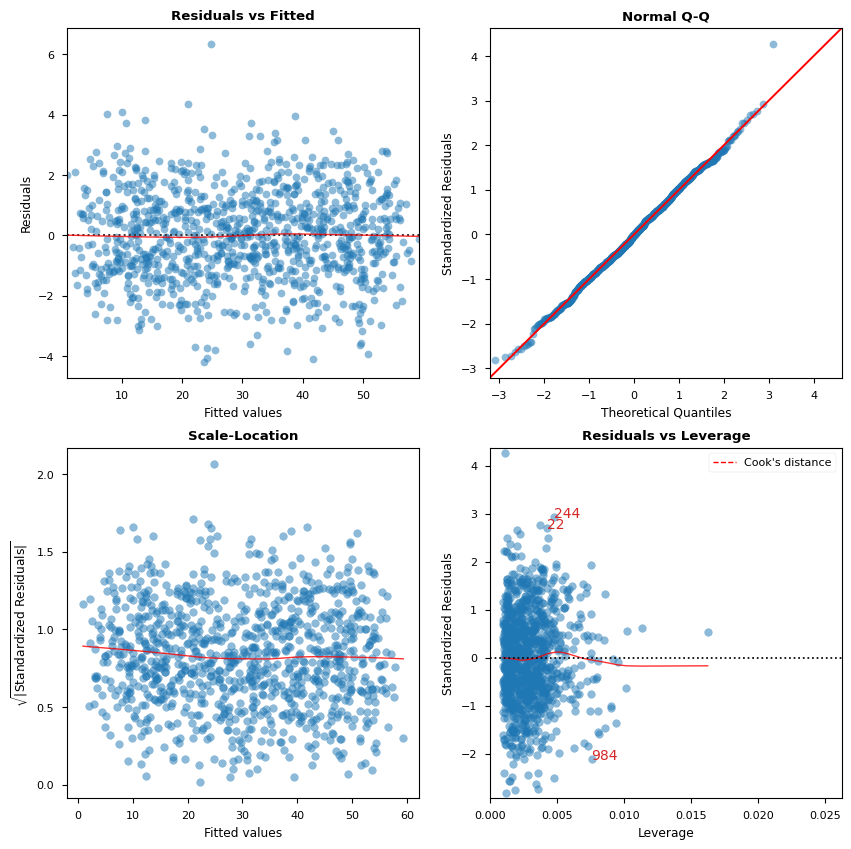

In [8]:
# Create plots:

ols_checker.ols_assumptions(df=df, 
                            y_true_col='y',
                            fittedvalues_col='pred',
                            features=['X1','X2'],
                            axis_lim=True,
                            constant=True)

### Compare to statsmodels solutions

In [9]:
import statsmodels
import statsmodels.api as sm
import pandas as pd

In [10]:
X = df[['X1', 'X2']]
y = df['y']

# Add a constant (intercept) to the independent variable(s)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.885e+04
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:52:19   Log-Likelihood:                -1813.6
No. Observations:                1000   AIC:                             3633.
Df Residuals:                     997   BIC:                             3648.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9469      0.094     52.658      0.0

In [11]:
import original

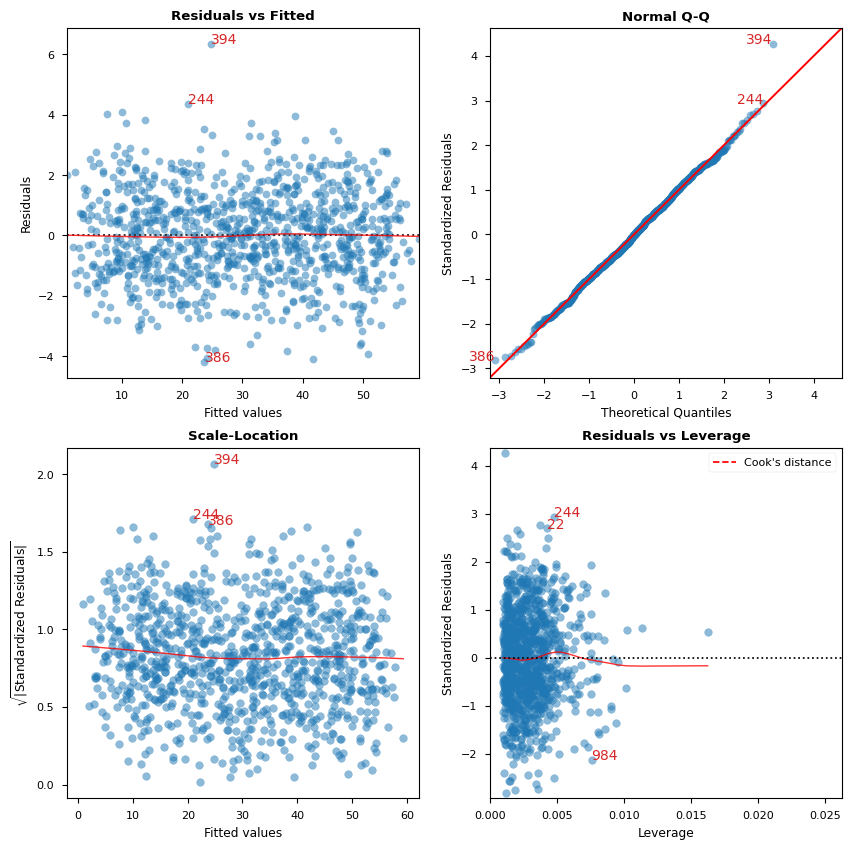

  Features  VIF Factor
0    const        4.00
1       X1       15.62
2       X2       15.62


In [12]:
cls = original.LinearRegDiagnostic(model)
vif, fig, ax = cls()
print(vif)